# GPy Model Basics

In [3]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib import pyplot as plt
import GPy

In [6]:
m = GPy.examples.regression.sparse_GP_regression_1D(plot=False, optimize=False)
m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [7]:
m.inducing_inputs

index,sparse_gp.inducing_inputs,constraints,priors
[0 0],2.12025819,,
[1 0],-2.07994579,,
[2 0],-2.95600609,,
[3 0],-2.45984738,,
[4 0],2.56581898,,


In [10]:
print(m[''])

  index  |          sparse_gp.inducing_inputs  |  constraints  |  priors
  [0 0]  |                         2.12025819  |               |        
  [1 0]  |                        -2.07994579  |               |        
  [2 0]  |                        -2.95600609  |               |        
  [3 0]  |                        -2.45984738  |               |        
  [4 0]  |                         2.56581898  |               |        
  -----  |             sparse_gp.rbf.variance  |  -----------  |  ------
  [0]    |                         1.00000000  |      +ve      |        
  -----  |          sparse_gp.rbf.lengthscale  |  -----------  |  ------
  [0]    |                         1.00000000  |      +ve      |        
  -----  |  sparse_gp.Gaussian_noise.variance  |  -----------  |  ------
  [0]    |                         1.00000000  |      +ve      |        


In [13]:
print("all gradients of the model:\n", m.gradient)
print("\n gradients of the rbf kernel:\n", m.rbf.gradient)

all gradients of the model:
 [ -23.76352512   14.92493446    5.55116311    9.21206493  -11.88604744
  -60.39731095  103.19963253 -137.35125963]

 gradients of the rbf kernel:
 [-60.39731095 103.19963253]


In [15]:
m.optimize()
print(m.gradient)

[-0.00034886  0.00010748  0.00182779  0.00044842 -0.0002566  -0.00015962
 -0.00033256 -0.01489032]


In [16]:
m.inducing_inputs

index,sparse_gp.inducing_inputs,constraints,priors
[0 0],1.49688203,,
[1 0],0.04931589,,
[2 0],-2.66548678,,
[3 0],-1.52927523,,
[4 0],2.72567450,,


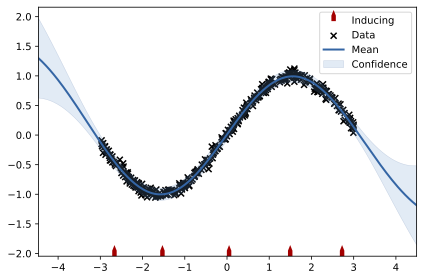

In [17]:
fig = m.plot()

# GPy Regression Basics

In [67]:
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05

In [77]:
kernel = GPy.kern.RBF(input_dim=1, variance=10., lengthscale=1)

In [78]:
m = GPy.models.GPRegression(X,Y,kernel)
m

GP_regression.,value,constraints,priors
rbf.variance,10.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


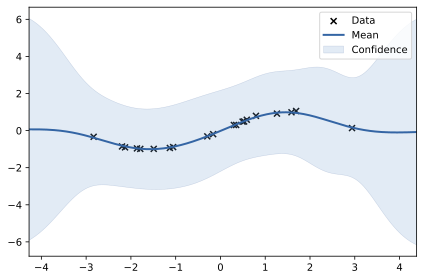

In [79]:
fig = m.plot()

In [30]:
m.optimize(messages=True)

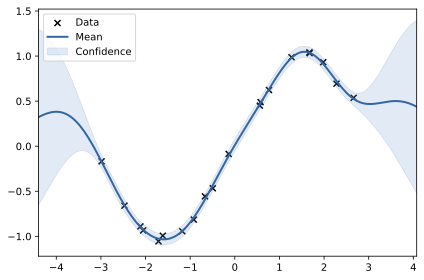

In [31]:
fig = m.plot()

In [32]:
m.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = -18.618974930589015
Optimization restart 2/10, f = -18.618974930611138
Optimization restart 3/10, f = -18.61897493061089
Optimization restart 4/10, f = -18.618974930612424
Optimization restart 5/10, f = -18.618974930584024
Optimization restart 6/10, f = -18.618974930606853
Optimization restart 7/10, f = -18.6189749305961
Optimization restart 8/10, f = -18.61897493061323
Optimization restart 9/10, f = -18.61897493055101
Optimization restart 10/10, f = -18.618974930612197


GP_regression.,value,constraints,priors
rbf.variance,0.388313799941857,+ve,
rbf.lengthscale,0.9933901512478276,+ve,
Gaussian_noise.variance,0.0007301222508313345,+ve,


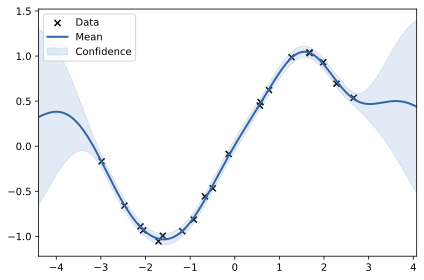

In [36]:
display(m)
fig = m.plot()